# Тестовое задание "Таблицы"

# Загрузка библиотек и чтение файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/angelinazigalova/Desktop/skazka_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Дата        570 non-null    object
 1   Клиент      570 non-null    int64 
 2   Цель        570 non-null    object
 3   Тип оплаты  570 non-null    object
 4   Сумма       570 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 22.4+ KB


In [4]:
data.head(3)

,Дата,Клиент,Цель,Тип оплаты,Сумма
0,2019-12-12 9:38:05,746434,Mini Jet,Карта сотрудника,90
1,2019-12-12 9:41:45,528126,Колесо обозрения,Карта сотрудника,113
2,2019-12-12 9:46:36,466603,Качалки детские,Карта сотрудника,187


# Предобработка данных

In [5]:
print('Количество найденых дубликатов:', data.duplicated().sum())

Количество найденых дубликатов: 0


## Привожу названия стобцов к нужному виду 

In [6]:
data.columns = ['date', 'user_id', 'goal', 'pay_type', 'cost']

## Убираю не нужные данные

In [7]:
data['pay_type'].value_counts()

Рубли                             388
Бонус                              55
Карта сотрудника                   33
Альпака от ПРОФОБР СВАО            27
Колесо от ПРОФОБР СВАО             26
Сказочная неделя ферма             18
Дино от департамента и науки       12
Колесо для инвалидов                4
Колесо #День рождения               3
Проверка терминалов Хаски Лэнд      2
Л Динопарк                          1
Л Дом вверх дном                    1
Name: pay_type, dtype: int64

В способах оплаты есть такие виды оплат, как карта сотрудника или проверка терминала. Удалю лишние данные и оставлю только рубли и бонусы.

In [8]:
list = ['Рубли', 'Бонус']
data = data.query('pay_type == list')

## Привожу столбцы к нужному типу данных

In [9]:
data['date'] = pd.to_datetime(data['date'])

# Задание 1. Найду среднее количество человек, пользующихся одной картой

С некоторых карт несколько раз покупаются одинаковые аттракционы. 

Для каждой карты найду максимальное количество покупок одного аттракциона

In [10]:
# Строю сводную таблицу и нахожу количество покупок для каждого аттракциона для каждой карты
data_new = data.pivot_table(index = 'user_id', columns = 'goal', values = 'cost', aggfunc = 'count').fillna(0).reset_index()
data_new = data_new.reset_index(drop = True)
data_new = data_new.drop(columns = ['user_id'],axis = 1)
# Добавляю новый столбец с самым большим значением из сроки
data_new['max'] = data_new.iloc[:,:].max(axis=1)
# Нахожу медианное значение для столбца
print('В среднем одной картой пользуются',data_new['max'].median(), 'человека')

В среднем одной картой пользуются 2.0 человека


# Задание 2. Найду среднее количество потраченных денег на 1 человека

In [11]:
# Строю сводную таблицу и считаю количество потраченных денег на каждую карту
data_avg = data.pivot_table(index = 'user_id', values = 'cost', aggfunc = 'sum').reset_index()
# Делю медианную трату на 1 карту на медианное количество человек на 1 карту
print('Среднее количество потраченных денег на человека:',data_avg['cost'].median()/data_new['max'].median(), '₽')

Среднее количество потраченных денег на человека: 431.5 ₽


# Задание 3. Рассмотрю  посещения аттракционнов и локаций парка

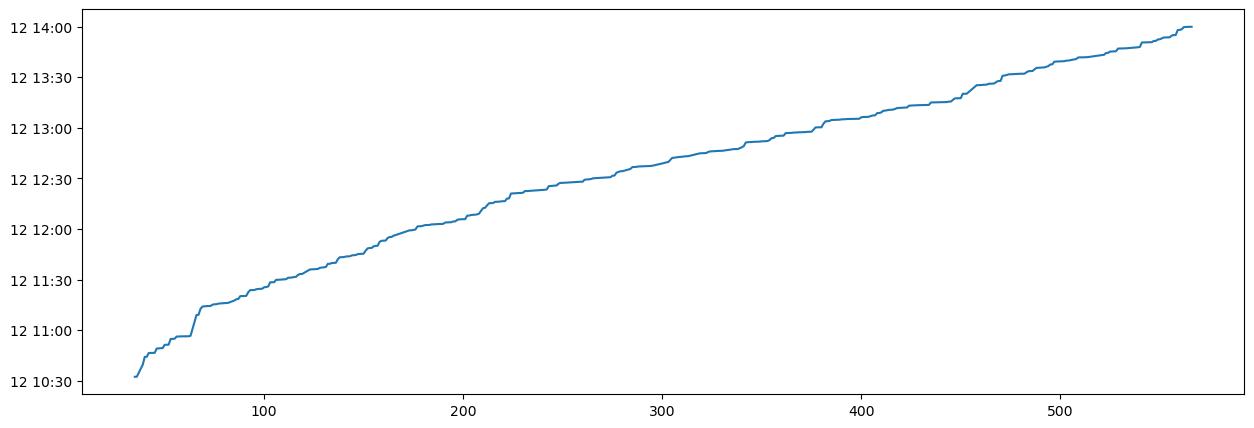

In [12]:
data['date'].plot(figsize = (15, 5))
plt.show()

Покупки в парке начинаются с 10:30 утра и заканчиваются в 14:00. Пик продаж приходится на 14:00

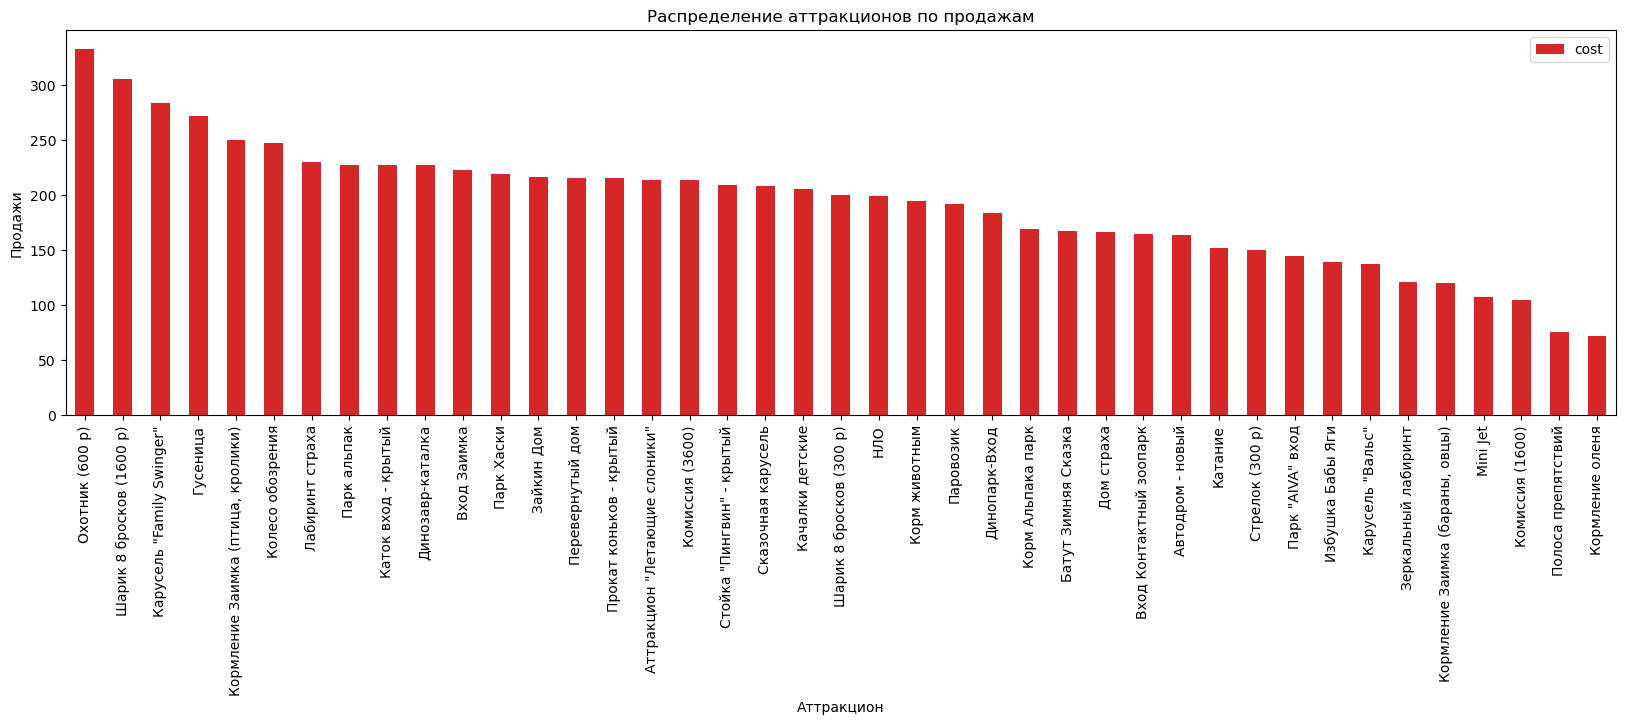

In [13]:
top_goal = data.pivot_table(index = "goal", values = "cost" , aggfunc = "median")
top_goal = top_goal.sort_values(ascending = False, by = "cost")
top_goal.plot(kind = 'bar', color= ('tab:red', '#66CDAA'), figsize = (20, 5))
plt.title('Распределение аттракционов по продажам')
plt.xlabel("Аттракцион")
plt.ylabel("Продажи")
plt.show()

Самым популлярным аттракционом является Охотник. Самый не популярный - кормление оленя. 

Посещаемость аттракционом распределена достаточно равномерно, выделяются полоса препятствий и кормление оленя - показывают низкие продажи.

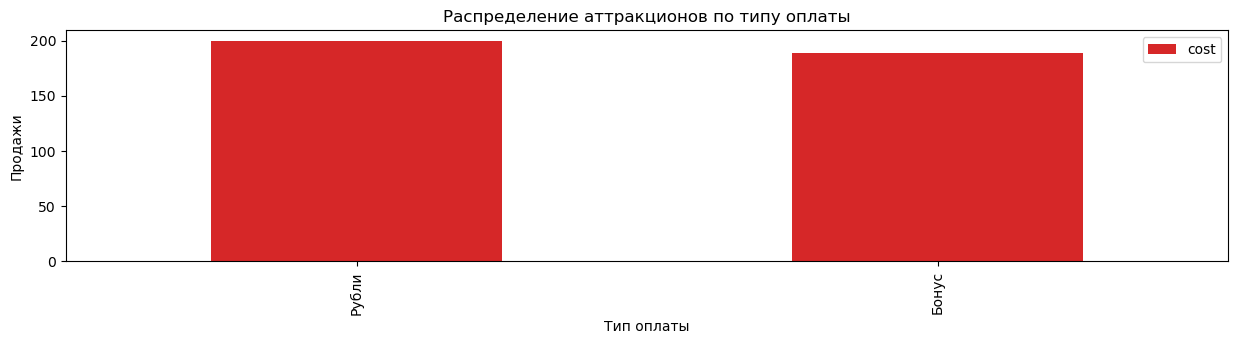

In [14]:
top_pay_type = data.pivot_table(index = "pay_type", values = "cost" , aggfunc = "median")
top_pay_type = top_pay_type.sort_values(ascending = False, by = "cost")
top_pay_type.plot(kind = 'bar', color= ('tab:red', '#66CDAA'), figsize = (15, 3))
plt.title('Распределение аттракционов по типу оплаты')
plt.xlabel("Тип оплаты")
plt.ylabel("Продажи")
plt.show()

В парке достаточно активно используются бонусы - медианные продажи пракчиски одинаковые.

# Задание 4. Как изменить состав выгрузки, чтобы данные о среднем количестве человек и средним тратам на человека было бы проще считать.

Сейчас в выгрузках, при покупке прохода на аттракцион для семьи отображается несколько отдельных транзакций.

Для корректного подсчета необходимо объединение показателя в одну тразакцию и добавление дополнительного показателя - количество билетов

Также можно собирать дополнительную информацию о владельце при оформлении карты парка, с возможностью указания количества членов семьи.

# Тестовое задание SQL

Checks:

- Id – уникальный идентификатор чека в системе, тип данных - целочисленное значение
- CashdeskId – идентификатор кассы, где был пробит чек, тип данных - целочисленное значение
- UserId – идентификатор пользователя, который пробил чек(кассира) - тип данных - целочисленное значение
- Time- время кассы, когда был пробит чек, тип данных — илиDateTi meOffset
- Type – тип чека, тип данных — строка(Sell – продажа, Return – возврат)
- Administrative – определяет был ли чек пробит через режим администратора, тип данных – bool(true/false)
- UserName - имя и фамилия кассира, тип данных - строка

CheckEntries – содержит позиции чеков:

- Id — идентификатор позиции чека в системе, тип данных — целочисленное значение
- CheckId — идентификатор чека в системе, тип данных — целочисленное значение
- Amount — количество товара, тип данных — decimal(число, с плавающей запятой)
- Price — цена товара, тип данных — decimal(число, с плавающей запятой)
- BasePrice — цена без учета модификаторов(скидки…), тип данных — decimal(число, с плавающей запятой)
- GoodType — наименование товара в системе, тип данных — строка(10 Аттракционов, 10 развлечений, Безлимит, Депозит …)
- CardId — идентификатор карты клиента, тип данных — целочисленное(может быть NULL)
- UserId — идентификатор клиента в системе, тип данных — целочисленное(может быть NULL)
- UserName - имя клиента в системе, тип данных - строка

# Задание 1. Необходимо написать запрос, который выводит сумму выручки, заработанной каждым кассиром за каждый день

SELECT c.username,
       CAST(DATE_TRUNC('day', time) AS date) as day,
       sum(price *  amount) as revenue
FROM checks as c
JOIN CheckEntries AS ch ON ch.id = c.id
GROUP BY c.username,
         CAST(DATE_TRUNC('day', time) AS date)

# Задание 2. Нужно вывести всех клиентов, совершивших хотя бы 2 транзакции на 33 неделе 2023 года, в порядке возрастания выручки на 33 неделе 2023

SELECT * 
FROM ( SELECT ch.username, 
              CAST(DATE_TRUNC('week', time) AS date), 
              SUM(price * amount) AS revenue
       FROM checks as c
       JOIN CheckEntries AS ch ON ch.id = c.id
       WHERE CAST(DATE_TRUNC('week', time) AS date) BETWEEN '33' AND '34'
       GROUP BY ch.username, 
                CAST(DATE_TRUNC('week', time) AS date)
       HAVING COUNT(*) >= 2)
ORDER BY revenue

# Задание 3. Задача со звездочкой. Сделать пункт 1) с той поправкой, что необходима сумма выручки на текущий момент времени

SELECT c.username, 
       sum(price * amount) AS revenue 
FROM checks as c
JOIN CheckEntries AS ch ON ch.id = c.id
WHERE time = GETDATE() 
GROUP BY username

# Тестовое задание Python

In [15]:
data_2 = pd.read_csv('/Users/angelinazigalova/Desktop/prohod.csv', sep = ';')

In [16]:
data_2.head(5)

,2023-04-01,4948053,Сказочная карусель,Депозит
0,2023-04-01,13189877,Дом страха,Депозит
1,2023-04-01,13189877,Дом страха,Депозит
2,2023-04-01,4948053,Смешарики вход,Депозит
3,2023-04-01,13189876,Ребенок до 90 см Альпака Парк,Депозит
4,2023-04-01,13189876,Парк альпак,"""Старый""Комбо 20 любых развлечений, Касса"


In [17]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13512 entries, 0 to 13511
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   2023-04-01          13512 non-null  object
 1   4948053             13512 non-null  int64 
 2   Сказочная карусель  13512 non-null  object
 3   Депозит             13512 non-null  object
dtypes: int64(1), object(3)
memory usage: 422.4+ KB


In [18]:
data_2.columns = ['date', 'user_id', 'goal', 'pay_type']

# Задание. Посчитать количество клиентов, посетивших локацию 360 за каждый день в апреле и в какой день конверсия была максимальной

In [19]:
# Так как в некоторых строках есть даты, а в других даты и время - создаю новый столбец
# с датой, привожу его в временному формату и удаляю информацию о времени покупки
data_2['date_new'] = pd.to_datetime(data_2['date'], format="%Y-%m-%d").dt.floor(freq='D')
# Создаю новый столбец с днем покупки
data_2['day'] = pd.DatetimeIndex(data_2['date_new']).day

In [20]:
# Создаю новую переменную со сводной таблицей, где собрано количество клиентов на каждый день
a = data_2.pivot_table(index = 'day', values = 'user_id', aggfunc = 'count').reset_index()
# Создаю новый датасет с фильтрацией по аттракциону 360
data_2_new = data_2.query("goal == '360'")
# Создаю новую переменную со сводной таблицей, где собрано количество клиентов на каждый день для локации 360
b = data_2_new.pivot_table(index = 'day', values = 'user_id', aggfunc = 'count').reset_index()
# Соединяю сводные таблицы по дню
result = pd.merge(a, b, on='day')
result.columns = ['day', 'total', 'total_360']
# Считаю конверсию в новом столбце
result['convers'] = round(result['total_360'] / result['total'], 3)
result.sort_values(by = 'convers', ascending = False)

,day,total,total_360,convers
2,3,1687,43,0.025
1,2,6511,138,0.021
0,1,5314,86,0.016


За первый день локацию 360 посетило 86 человек, второй день - 138, третий - 43

Максимальный показатель конверсии был на 3 день - 0.025 от общего количества посетителей на этот день